In [2]:
import os
import yt
import numpy as np
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.axes_grid1 import AxesGrid
from utils import grabFileSeries, get_simulation_time, change_in_box

print(yt.__version__)
os.system("python --version")
yt.set_log_level(50)        
"""
Possible values of set_log_level by increasing level:
        0 or "notset"
        1 or "all"
        10 or "debug"
        20 or "info"
        30 or "warning"
        40 or "error"
        50 or "critical"
"""

## Checking derived or innate field lists
# ds = ts[0]
# ds.derived_field_list
# print(ds.field_list)
# ad = ds.all_data()
# test = np.array(ad[('athena_pp', 'vel1')])
## Defining field variables so quickly changing them is easier
keoverme, keoverte = ('gas', 'KEoverME'), ('gas', 'KEoverTE')
current_eta_z = ('gas', 'current_eta_z')

Bcc1, Bcc2, Bcc3 = ('athena_pp', 'Bcc1'), ('athena_pp', 'Bcc2'), ('athena_pp', 'Bcc3')
cell_volume = ('athena_pp', 'cell_volume')
dx, dy, dz = ('athena_pp', 'dx'), ('athena_pp', 'dy'), ('athena_pp', 'dz')
Etot = ('athena_pp', 'Etot')
path_element_x, path_element_y, path_element_z = ('athena_pp', 'path_element_x'), ('athena_pp', 'path_element_y'), ('athena_pp', 'path_element_z')
press, rho = ('athena_pp', 'press'), ('athena_pp', 'rho')
vel1, vel2, vel3 = ('athena_pp', 'vel1'), ('athena_pp', 'vel2'), ('athena_pp', 'vel3')
volume, x, y, z = ('athena_pp', 'volume'), ('athena_pp', 'x'), ('athena_pp', 'y'), ('athena_pp', 'z')
alfven_speed, angular_momentum_magnitude = ('gas', 'alfven_speed'), ('gas', 'angular_momentum_magnitude')
angular_momentum_x, angular_momentum_y, angular_momentum_z = ('gas', 'angular_momentum_x'), ('gas', 'angular_momentum_y'), ('gas', 'angular_momentum_z')
averaged_density, baroclinic_vorticity_magnitude = ('gas', 'averaged_density'), ('gas', 'baroclinic_vorticity_magnitude')
baroclinic_vorticity_x, baroclinic_vorticity_y, baroclinic_vorticity_z = ('gas', 'baroclinic_vorticity_x'), ('gas', 'baroclinic_vorticity_y'), ('gas', 'baroclinic_vorticity_z')
cell_mass, cell_volume = ('gas', 'cell_mass'), ('gas', 'cell_volume')
courant_time_step, density = ('gas', 'courant_time_step'), ('gas', 'density')
density_gradient_magnitude, density_gradient_x, density_gradient_y, density_gradient_z = ('gas', 'density_gradient_magnitude'), ('gas', 'density_gradient_x'), ('gas', 'density_gradient_y'), ('gas', 'density_gradient_z')
dx_gas, dy_gas, dynamical_time, dz_gas = ('gas', 'dx'), ('gas', 'dy'), ('gas', 'dynamical_time'), ('gas', 'dz')
jeans_mass, kT, kinetic_energy_density, lorentz_factor = ('gas', 'jeans_mass'), ('gas', 'kT'), ('gas', 'kinetic_energy_density'), ('gas', 'lorentz_factor')
mach_alfven, mach_number = ('gas', 'mach_alfven'), ('gas', 'mach_number')
magnetic_energy_density, magnetic_field_los, magnetic_field_magnitude = ('gas', 'magnetic_energy_density'), ('gas', 'magnetic_field_los'), ('gas', 'magnetic_field_magnitude')
magnetic_field_strength, magnetic_field_x, magnetic_field_y, magnetic_field_z = ('gas', 'magnetic_field_strength'), ('gas', 'magnetic_field_x'), ('gas', 'magnetic_field_y'), ('gas', 'magnetic_field_z')
magnetic_pressure, mass, mean_molecular_weight = ('gas', 'magnetic_pressure'), ('gas', 'mass'), ('gas', 'mean_molecular_weight')
momentum_density_x, momentum_density_y, momentum_density_z = ('gas', 'momentum_density_x'), ('gas', 'momentum_density_y'), ('gas', 'momentum_density_z')
momentum_x, momentum_y, momentum_z = ('gas', 'momentum_x'), ('gas', 'momentum_y'), ('gas', 'momentum_z')
number_density, plasma_beta = ('gas', 'number_density'), ('gas', 'plasma_beta')
pressure, pressure_gradient_magnitude, pressure_gradient_x, pressure_gradient_y, pressure_gradient_z = ('gas', 'pressure'), ('gas', 'pressure_gradient_magnitude'), ('gas', 'pressure_gradient_x'), ('gas', 'pressure_gradient_y'), ('gas', 'pressure_gradient_z')
relative_magnetic_field_x, relative_magnetic_field_y, relative_magnetic_field_z = ('gas', 'relative_magnetic_field_x'), ('gas', 'relative_magnetic_field_y'), ('gas', 'relative_magnetic_field_z')
relative_velocity_x, relative_velocity_y, relative_velocity_z = ('gas', 'relative_velocity_x'), ('gas', 'relative_velocity_y'), ('gas', 'relative_velocity_z')
shear, shear_criterion, shear_mach, sound_speed = ('gas', 'shear'), ('gas', 'shear_criterion'), ('gas', 'shear_mach'), ('gas', 'sound_speed')
specific_angular_momentum_magnitude, specific_angular_momentum_x, specific_angular_momentum_y, specific_angular_momentum_z = ('gas', 'specific_angular_momentum_magnitude'), ('gas', 'specific_angular_momentum_x'), ('gas', 'specific_angular_momentum_y'), ('gas', 'specific_angular_momentum_z')
specifici_thermal_energy, temperature, velocity_los = ('gas', 'specific_thermal_energy'), ('gas', 'temperature'), ('gas', 'velocity_los')
velocity_magnitude, velocity_x, velocity_y, velocity_z = ('gas', 'velocity_magnitude'), ('gas', 'velocity_x'), ('gas', 'velocity_y'), ('gas', 'velocity_z')
volume, vorticity_magnitude, vorticity_squared = ('gas', 'volume'), ('gas', 'vorticity_magnitude'), ('gas', 'vorticity_squared')
vorticity_x, vorticity_y, vorticity_z = ('gas', 'vorticity_x'), ('gas', 'vorticity_y'), ('gas', 'vorticity_z')
x_gas, y_gas, z_gas = ('gas', 'x'), ('gas', 'y'), ('gas', 'z')

## Defining Dictionary for easy access
# scratchPath = "/mnt/gs21/scratch/freem386/"
directoryDict = {'rh1': 'recon_harris1/', 'rw1': 'recon_wire1/', 'rh2': 'recon_harris2/',
                 'rh3': 'recon_harris3/', 'rg1': 'recon_GEM1/', 'rb1': 'recon_bhat1/', 
                 'rb2': 'recon_bhat2/', 'rb3': 'recon_bhat3/',
                 'rf1': 'recon_freem1/', 'rf2': 'recon_freem2/', 'rf3': 'recon_freem3/',
                 'rf4': 'recon_freem4/', 'rf5': 'recon_freem5/', 'rf6': 'recon_freem6/',
                 'rf7': 'recon_freem7/', 'rf8': 'recon_freem8/',
                 'rs1': 'recon_fast1/', 'rs2': 'recon_fast2/', 'rs3': 'recon_fast3/',
                 'rs4': 'recon_fast4/'}

4.3.1
Python 3.12.4


/mnt/gs21/scratch/freem386/recon_fast4/recon_fast.out2.00000.athdf


/mnt/home/freem386/anaconda3/envs/research/lib/python3.12/site-packages/matplotlib/quiver.py:649: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/mnt/home/freem386/anaconda3/envs/research/lib/python3.12/site-packages/matplotlib/quiver.py:649: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


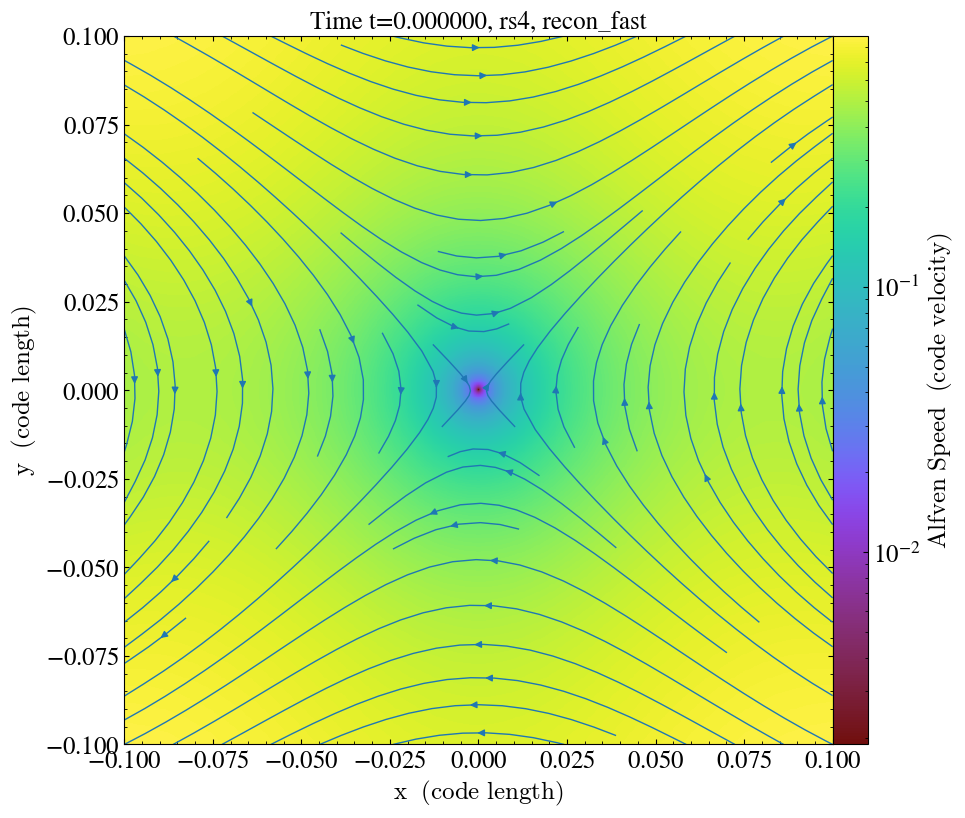

In [9]:
## Plotting a single dataset
index = 0
dictkey = "rs4"
basename = "recon_fast"
inputname = "athinput." + basename       # MagNoh2 for most problems
fileseries = grabFileSeries(directoryDict[dictkey], index, basename=basename)# , outputnum="out3")
print(fileseries[index])
ts = yt.DatasetSeries(fileseries)
time = get_simulation_time(fileseries[index])
outputfreq = 1
ds = ts[index]

field = alfven_speed
p = yt.SlicePlot(ds, "z", field) #, window_size=(8,6))

# p.pan([np.sqrt(2)/8, 0.0])
# p.pan([2/6,0])
p.zoom(10)

p.annotate_velocity()
p.annotate_streamlines(("gas", "magnetic_field_x"), ("gas", "magnetic_field_y"))

# Annotate box test
# xmin, xmax = -0.00625, 0.00625
# ymin, ymax = -0.027778, 0.027778
# p.annotate_line((xmin, ymin,0), (xmax, ymin,0), coord_system="data")
# p.annotate_line((xmax, ymin,0), (xmax, ymax,0), coord_system="data")
# p.annotate_line((xmax, ymax,0), (xmin, ymax,0), coord_system="data")
# p.annotate_line((xmin, ymax,0), (xmin, ymin,0), coord_system="data")

# p.set_log(field, False)
# p.annotate_grids()

if time==None: p.annotate_title(f'Cycle n={index*outputfreq}, {dictkey}, {basename}')
else: p.annotate_title(f'Time t={time:.6f}, {dictkey}, {basename}')
fig = p.export_to_mpl_figure((1,1))
# fig.axes[0].set_ylim(-0.004,0.004)
# fig.axes[0].set_box_aspect(0.333)
# fig.savefig(f"figures/{dictkey}_t{time:.3f}_x80.png")
p;

In [ ]:
## Plotting multiple different fields
# Choose the dataset index
index = 0
dictkey = "rg1"
basename = "recon_GEM"
inputname = "athinput." + basename       # MagNoh2 for most problems
fileseries = grabFileSeries(directoryDict[dictkey], index, basename=basename)
print(fileseries[index])
ts = yt.DatasetSeries(fileseries)
ds = ts[index]
# p = yt.plot_2d(ds, ("athena_pp","press"))
# p.annotate_grids()
# p.annotate_streamlines(("gas", "magnetic_field_x"), ("gas", "magnetic_field_y"))

fields = [
('gas', 'magnetic_energy_density'), ('gas', 'magnetic_field_x'), ('gas', 'magnetic_field_y'),
('gas', 'mach_number'), ('gas', 'momentum_density_x'), ('gas', 'momentum_density_y'),
('gas', 'density'), ('gas', 'pressure'), ('gas', 'plasma_beta'), 
]
p = yt.SlicePlot(ds, "z", fields)
fig = p.export_to_mpl_figure((3, 3))
fig.suptitle("Timestep " + str(index))

# Adjust the layout
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to prevent overlap with suptitle
fig.set_size_inches(12,12)
fig.subplots_adjust(wspace=0.05, hspace=0.01)  # Set small values for minimal spacing

# Iterate over each axis in the figure to modify the colorbar labels
for ax, field in zip(fig.axes, fields):
    if hasattr(ax, 'images') and ax.images:
        img = ax.images[0]
        cbar = img.colorbar
        if cbar is not None:
            # Set the font size for the colorbar labels
            cbar.ax.tick_params(labelsize=8)
            # Set the custom label for the colorbar
            cbar.set_label(field[1], fontsize=14)
            


In [ ]:
## Getting radial profiles
index = 1
dictkey = "magnoh_m18"
basename = 'magnoh_smooth'       # MagNoh2 for most problems
fileseries = grabFileSeries(directoryDict[dictkey], index, basename=basename)
ts = yt.DatasetSeries(fileseries)
ds = ts[index]

field = pressure

my_sphere = ds.sphere("C", 3.0)

plot = yt.ProfilePlot(
    my_sphere,
    ("index", "radius"),
    field,
)

plot.set_log(("index", "radius"), False)
plot.set_log(field, False)
plot.annotate_title("Pressure of smooth_magnoh v1")
plot.save("figures/cycle1_smooth_v1.png")

plot.show()


# dims = (600, 600)

# all_data = ds.all_data()
# p = np.reshape(all_data[pressure], dims)[300, :]
# d = np.reshape(all_data[density], dims)[300, :]
# ux = np.reshape(all_data[momentum_x], dims)[300, :]

# x = np.linspace(-3.0, 3.0, 600)

# plt.plot(x, p, label="p")
# plt.plot(x, ux, label="ux")
# # plt.plot(x, d, label="d")
# plt.legend()
# plt.show()

In [62]:
## Plotting a bunch of datasets in a row
# Plotting a single dataset
dictkey = "rs1"
basename = "recon_fast"
inputname = "athinput." + basename       # MagNoh2 for most problems
fileseries = grabFileSeries(directoryDict[dictkey], 508, basename=basename)# , outputnum="out3")
print(fileseries[index])
ts = yt.DatasetSeries(fileseries)
for index in np.arange(450, 508, 1, dtype=int):
    print(index)
    time = get_simulation_time(fileseries[index])
    ds = ts[index]

    field = pressure
    p = yt.SlicePlot(ds, "z", field) #, window_size=(8,6))

    # p.pan([np.sqrt(2)/8, 0.0])
    p.zoom(20)

    p.annotate_streamlines(("gas", "magnetic_field_x"), ("gas", "magnetic_field_y"))

    p.annotate_title(f'Time t={time:.6f}, {dictkey}, {basename}')
    fig = p.export_to_mpl_figure((1,1))
    fig.savefig(f"figures/{dictkey}_x20_Xnull_{index:05}.png")


/mnt/gs21/scratch/freem386/recon_freem8/recon_freem.out2.00480.athdf
450


KeyboardInterrupt: 

In [15]:
plt.close("all")

/mnt/gs21/scratch/freem386/recon_fast3/recon_fast.out2.06000.athdf
<class 'numpy.ndarray'>


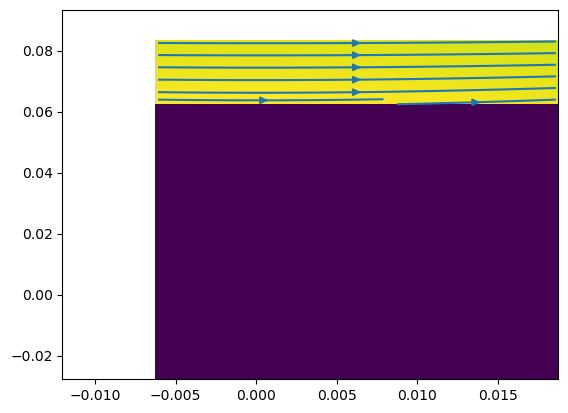

ZeroDivisionError: float division by zero

In [17]:
## Grabbing raw np data from datasets
write_to_file = True
index = 6000
dictkey = "rs3"
basename = "recon_fast"
inputname = "athinput." + basename       # MagNoh2 for most problems
fileseries = grabFileSeries(directoryDict[dictkey], index, basename=basename)
print(fileseries[index])
ts = yt.DatasetSeries(fileseries)
ds = ts[index]
dt = get_simulation_time(fileseries[1]) - get_simulation_time(fileseries[0])

grid_size_const = 6400*2
zoom = 20.0
x_zoom = 8.0
y_zoom = 1.8
xmin = [0-1/zoom/x_zoom, 0-1/zoom/y_zoom, 0]
dims = np.array([grid_size_const//zoom//x_zoom, grid_size_const//zoom//y_zoom,1])

max_level = ds.max_level

# # #
# # To plot these datasets
cg = ds.covering_grid(2, left_edge=xmin, dims=dims)
X, Y = cg["athena_pp","x"], cg["athena_pp","y"]
x = X[:,0,0]
y = Y[0,:,0]
d = cg["gas", "pressure"][:,:,0]
print(type(d.v))
plt.streamplot(x.v, y.v, cg["gas", "magnetic_field_x"][:,:,0].v.T, cg["gas", "magnetic_field_y"][:,:,0].v.T)
plt.pcolor(x, y, d.T)
plt.show()
x = 1.0/0.0
# # #

# print(xmin)
max_level = ds.max_level

h = f"# Total zoom {zoom}, total x-zoom {x_zoom}, total y-zoom {y_zoom}\n"
h = h + f"# i \t|\t\t t \t|\t MEtot\t|\t dMEtot \t|\t KEtot\t|\t dKEtot \t|\t Pdvtot \t|\t dTEtot \t|\t Etot"
print(h)
if write_to_file == True:
    fname = f"energies_{zoom:.2f}x_with_flux_{dictkey}.txt"
    f = open(fname, "a")
    f.write(h + "\n")
    print(f"writing to file " + fname)

for i in range(100, 6000):
    ds = ts[i]
    cg = ds.covering_grid(max_level, left_edge=xmin, dims=dims)
    tnow = get_simulation_time(fileseries[i])
    tprev = get_simulation_time(fileseries[i-1])
    dt = tnow - tprev
    # print(dt)

    X, Y = cg["athena_pp","x"].v, cg["athena_pp","y"].v
    x = X[:,0,0]
    y = Y[0,:,0]

    d = cg["gas", "density"][:,:,0].v
    u = cg["gas", "velocity_x"][:,:,0].v
    v = cg["gas", "velocity_y"][:,:,0].v
    w = cg["gas", "velocity_z"][:,:,0].v
    vel = cg["gas", "velocity_magnitude"][:,:,0].v
    ked = 0.5*np.multiply(d, vel*vel)

    dx = cg["athena_pp", "dx"][0,0,0].v
    dy = cg["athena_pp", "dy"][0,0,0].v
    dz = cg["athena_pp", "dz"][0,0,0].v
    dv = dx*dy*dz

    med = cg["gas", "magnetic_energy_density"][:,:,0].v

    p = cg["gas", "pressure"][:,:,0].v
    # gamma = 1.001       # p=(g-1)d*e
    # e = p/(gamma-1)/d
    
    # Slicing to *JUST* inside the original frame so we don't double count edges
    TEtot = np.sum(p[1:-1])*dv
    MEtot = np.sum(med[1:-1])*dv
    KEtot = np.sum(ked[1:-1])*dv
    Etot = TEtot + MEtot + KEtot
    
    mechange = change_in_box(med, u, v, dx, dy, dz, dt)
    kechange = change_in_box(ked, u, v, dx, dy, dz, dt)
    techange = change_in_box(p, u, v, dx, dy, dz, dt)

    s = f"{i}\t,\t{tnow:.5e},\t{MEtot:.5e},\t{mechange:.5e}\t,\t{KEtot:.5e}\t,\t{kechange:.5e}\t,\t{TEtot:.5e}\t,\t{techange:.5e}\t,\t{Etot:.5e}"
    print(s)
    if write_to_file == True: f.write(s + "\n")
    

if write_to_file == True: f.close()

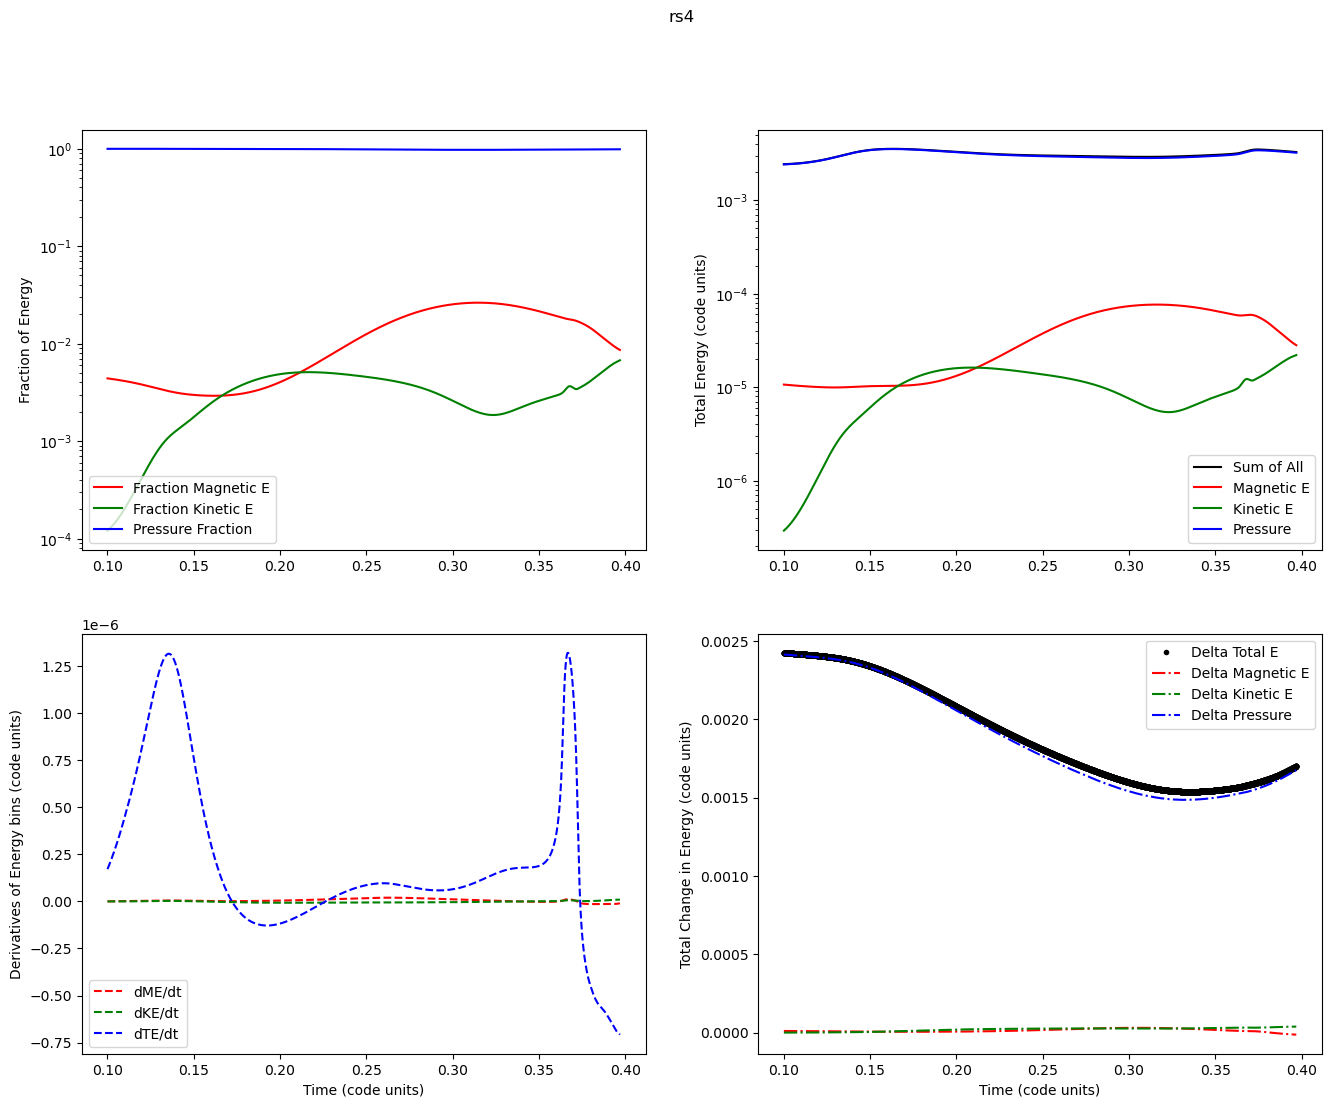

In [9]:
alldata = np.loadtxt("energies_20.00x_with_flux_rs4_s101_e7900.txt", delimiter=",")
dictkey = "rs4"
# alldata = np.loadtxt("energies_20.00x_with_flux_rs1.txt", delimiter=",")
# dictkey = "rs1"

# dt = 0.0005
ii, ti, mei, kei, pi, eti = 0, 1, 2, 4, 6, 8
mefi, kefi, tefi = 3, 5, 7
t, me, ke, p, et = alldata[:,ti], alldata[:,mei], alldata[:,kei], alldata[:,pi], alldata[:,eti]
mef, kef, tef = alldata[:,mefi], alldata[:, kefi], alldata[:, tefi]
deltaME, deltaKE, deltaTE, deltaE = np.zeros_like(me), np.zeros_like(ke), np.zeros_like(p), np.zeros_like(et)

# # Generating a dt array
# dt = np.zeros_like(t)
# for j in range(len(dt)-1):
#     dt[j+1] = t[j+1]-t[j]
# dt[0] = dt[-1] # Filling out last with just equivalent of previous

grid_size_const = 6400*2
zoom = 20.0
x_zoom = 8.0
y_zoom = 1.8
xmin = [0-1/zoom/x_zoom, 0-1/zoom/y_zoom, 0]

roi = 1        # Region of interest (integer) - integer to START plots from
# roi = 1

f, ax = plt.subplots(2,2)
f.set_size_inches(16, 12)
ax[0,0].plot(t[roi:], me[roi:]/et[roi:], "r-", label="Fraction Magnetic E")
ax[0,0].plot(t[roi:], ke[roi:]/et[roi:], "g-", label="Fraction Kinetic E")
ax[0,0].plot(t[roi:], p[roi:]/et[roi:], "b-", label="Pressure Fraction")

ax[1,0].plot(t[roi:], mef[roi:], "r--", label="dME/dt")
ax[1,0].plot(t[roi:], kef[roi:], "g--", label="dKE/dt")
ax[1,0].plot(t[roi:], tef[roi:], "b--", label="dTE/dt")

ax[0,1].plot(t[roi:], et[roi:], "k", label="Sum of All")
ax[0,1].plot(t[roi:], me[roi:], "r-", label="Magnetic E")
ax[0,1].plot(t[roi:], ke[roi:], "g-", label="Kinetic E")
ax[0,1].plot(t[roi:], p[roi:], "b-", label="Pressure")

# Calculating total minus change at each timestep
total_change_me, total_change_ke, total_change_te = 0, 0, 0
for j in range(len(t)):
    total_change_me += mef[j]
    total_change_ke += kef[j]
    total_change_te += tef[j]
    
    deltaME[j] = me[j] - total_change_me
    deltaKE[j] = ke[j] - total_change_ke
    deltaTE[j] = p[j] - total_change_te
    deltaE[j] = deltaME[j] + deltaKE[j] + deltaTE[j]
    et[j] = et[j] - total_change_me - total_change_ke - total_change_te
    # if 16700 < j < 16800: print(j, total_change_me, deltaME[j])
# 1.0/0.0

ax[1,1].plot(t[roi:], deltaE[roi:], "k.", label="Delta Total E")
ax[1,1].plot(t[roi:], deltaME[roi:], "r-.", label="Delta Magnetic E")
ax[1,1].plot(t[roi:], deltaKE[roi:], "g-.", label="Delta Kinetic E")
ax[1,1].plot(t[roi:], deltaTE[roi:], "b-.", label="Delta Pressure")

ax[0,0].legend(loc=3)
ax[0,0].set_ylabel("Fraction of Energy")
ax[0,0].set_yscale("log")
ax[1,0].legend()
ax[1,0].set_ylabel("Derivatives of Energy bins (code units)")
ax[1,0].set_xlabel("Time (code units)")
ax[0,1].legend()
ax[0,1].set_ylabel("Total Energy (code units)")
ax[0,1].set_yscale("log")
ax[1,1].legend()
ax[1,1].set_ylabel("Total Change in Energy (code units)")
ax[1,1].set_xlabel("Time (code units)")


# ax.set_yscale("log")
f.suptitle(dictkey)
f.show()
plt.savefig(f"energy_quantities_{dictkey}_z{zoom}_xmin{xmin[0]:.3e}_ymin{xmin[1]:.3e}.png")

In [20]:
## Todo check to see where the energy is being stored - thermal energy should spike and magnetic energy should dip if reconnection happens interestingly
ts = yt.DatasetSeries(fileseries)
ke_tot = np.zeros(max_index//step + 1)
me_tot = np.zeros(max_index//step + 1)
te_tot = np.zeros(max_index//step + 1)

for index in range(max_index//step + 1):
    print("{:.3f}".format(100*index*step/max_index), end='\r')
    # Calculating grid information for NP sums
    ds = ts[index]
    max_level = ds.index.max_level      # Max AMR level - included for if AMR is turned on later
    low = ds.domain_left_edge           # Domain left edge for numpy conversion starting region
    dims = ds.domain_dimensions         # Dimensions of full domain

    all_data_level_0 = ds.covering_grid(level=max_level, left_edge=low, dims=dims)
    ke_tot[index] = np.sum(all_data_level_0["gas", "kinetic_energy_density"])
    me_tot[index] = np.sum(all_data_level_0["gas", "magnetic_energy_density"])
    te_tot[index] = np.sum(all_data_level_0["gas", "pressure"])

NameError: name 'max_index' is not defined

In [16]:
## Dump energy totals... Deprecated
import pickle as pkl
pkl.dump(ke_tot, open(f"ke_tot_{dictkey}_{step}_{max_index}.pkl", 'wb'))
pkl.dump(me_tot, open(f"me_tot_{dictkey}_{step}_{max_index}.pkl", 'wb'))
pkl.dump(te_tot, open(f"te_tot_{dictkey}_{step}_{max_index}.pkl", 'wb'))

In [7]:
## Retrieve energy totals... Deprecated
import pickle as pkl
ke_tot = pkl.load(open(f"ke_tot_{dictkey}_{step}_{max_index}.pkl", 'rb'))
me_tot = pkl.load(open(f"me_tot_{dictkey}_{step}_{max_index}.pkl", 'rb'))
te_tot = pkl.load(open(f"te_tot_{dictkey}_{step}_{max_index}.pkl", 'rb'))

0.003166286988823053 code_pressure


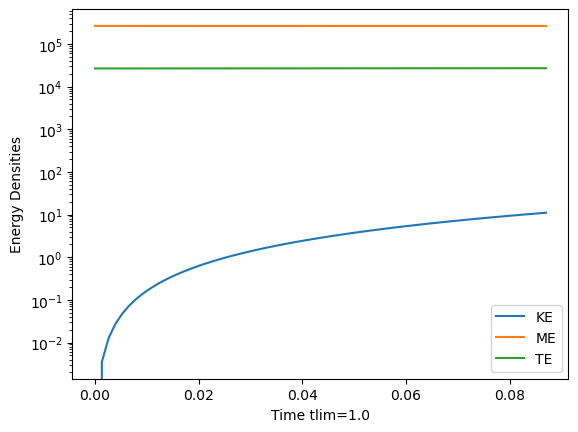

[0.00000000e+00 3.51154595e-03 1.28171343e-02 2.75969494e-02
 4.77478836e-02 7.32051454e-02 1.03921950e-01 1.39861821e-01
 1.80994838e-01 2.27295561e-01 2.78741780e-01 3.35313703e-01
 3.96993405e-01 4.63764440e-01 5.35611560e-01 6.12520500e-01
 6.94477819e-01 7.81470769e-01 8.73487202e-01 9.70515479e-01
 1.07254442e+00 1.17956321e+00 1.29156143e+00 1.40852893e+00
 1.53045586e+00 1.65733260e+00 1.78914978e+00 1.92589821e+00
 2.06756891e+00 2.21415306e+00 2.36564197e+00 2.52202715e+00
 2.68330019e+00 2.84945282e+00 3.02047690e+00 3.19636438e+00
 3.37710730e+00 3.56269781e+00 3.75312814e+00 3.94839058e+00
 4.14847753e+00 4.35338145e+00 4.56309484e+00 4.77761029e+00
 4.99692044e+00 5.22101799e+00 5.44989568e+00 5.68354632e+00
 5.92196274e+00 6.16513785e+00 6.41306457e+00 6.66573587e+00
 6.92314476e+00 7.18528429e+00 7.45214753e+00 7.72372761e+00
 8.00001766e+00 8.28101086e+00 8.56670041e+00 8.85707955e+00
 9.15214162e+00 9.45187995e+00 9.75628787e+00 1.00653587e+01
 1.03790858e+01 1.069746

In [12]:
## Plotting energy over time
index = 0
ds = ts[index]
max_level = ds.index.max_level      # Max AMR level - included for if AMR is turned on later
low = ds.domain_left_edge           # Domain left edge for numpy conversion starting region
dims = ds.domain_dimensions         # Dimensions of full domain

all_data_level_0 = ds.covering_grid(level=max_level, left_edge=low, dims=dims)
print(all_data_level_0["gas", "pressure"].min())

t = np.arange(0, max_index, step) * 8.78906e-05
plt.plot(t, ke_tot, label='KE')
plt.plot(t, me_tot, label="ME")
plt.plot(t, te_tot, label="TE")
plt.yscale("log")
plt.legend()
plt.ylabel("Energy Densities")
plt.xlabel("Time tlim=1.0")

plt.show()
print(ke_tot)

In [34]:
## Adding missing kinetic/magnetic/pressure ratios and current that are missing in YT 
def _KEoverME(field, data):
    return (
        data["gas", "kinetic_energy_density"] / data["gas", "magnetic_energy_density"]
    )
    
def _KEoverTE(field, data):
    return (
        data["gas", "kinetic_energy_density"] / data["gas", "pressure"]
    )
    
def _current_eta_z(field, data):
    # u = data["gas", "velocity_x"], data["gas", "velocity_y"], data["gas", "velocity_z"]
    # b = data["gas", "magnetic_field_x"], data["gas", "magnetic_field_y"], data["gas", "magnetic_field_z"]
    B = np.stack((data["gas", "magnetic_field_x"], data["gas", "magnetic_field_y"], data["gas", "magnetic_field_z"]), axis=-1)
    U = np.stack((data["gas", "velocity_x"], data["gas", "velocity_y"], data["gas", "velocity_z"]), axis=-1)
    J = yt.units._numpy_wrapper_functions.ucross(U, B, registry=data.ds.unit_registry)
    return J[:, 2]

yt.add_field(
    name=("gas", "current_eta_z"),
    function=_current_eta_z,
    sampling_type="local",
    units="dimensionless",
    force_override=True,
)
    
yt.add_field(
    name=("gas", "KEoverME"),
    function=_KEoverME,
    sampling_type="local",
    units="code_pressure/code_pressure",
    force_override=True,
)

yt.add_field(
    name=("gas", "KEoverTE"),
    function=_KEoverTE,
    sampling_type="local",
    units="code_pressure/code_pressure",
    force_override=True,
)

In [61]:
ds.derived_field_list

[('athena_pp', 'Bcc1'),
 ('athena_pp', 'Bcc2'),
 ('athena_pp', 'Bcc3'),
 ('athena_pp', 'cell_volume'),
 ('athena_pp', 'dx'),
 ('athena_pp', 'dy'),
 ('athena_pp', 'dz'),
 ('athena_pp', 'path_element_x'),
 ('athena_pp', 'path_element_y'),
 ('athena_pp', 'path_element_z'),
 ('athena_pp', 'press'),
 ('athena_pp', 'rho'),
 ('athena_pp', 'vel1'),
 ('athena_pp', 'vel2'),
 ('athena_pp', 'vel3'),
 ('athena_pp', 'volume'),
 ('athena_pp', 'x'),
 ('athena_pp', 'y'),
 ('athena_pp', 'z'),
 ('gas', 'alfven_speed'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'courant_time_step'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('g

In [15]:
eta_ohm = 1e-5
L = 0.05
v_a = 1

S_L = v_a * L / eta_ohm
print(f"{S_L:.4e}")

5.0000e+03
